In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from IPython.display import display, Markdown
%matplotlib inline

In [186]:
housing = fetch_california_housing(as_frame=True)

In [187]:
display(Markdown(housing.DESCR))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. rubric:: References

- Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
  Statistics and Probability Letters, 33 (1997) 291-297


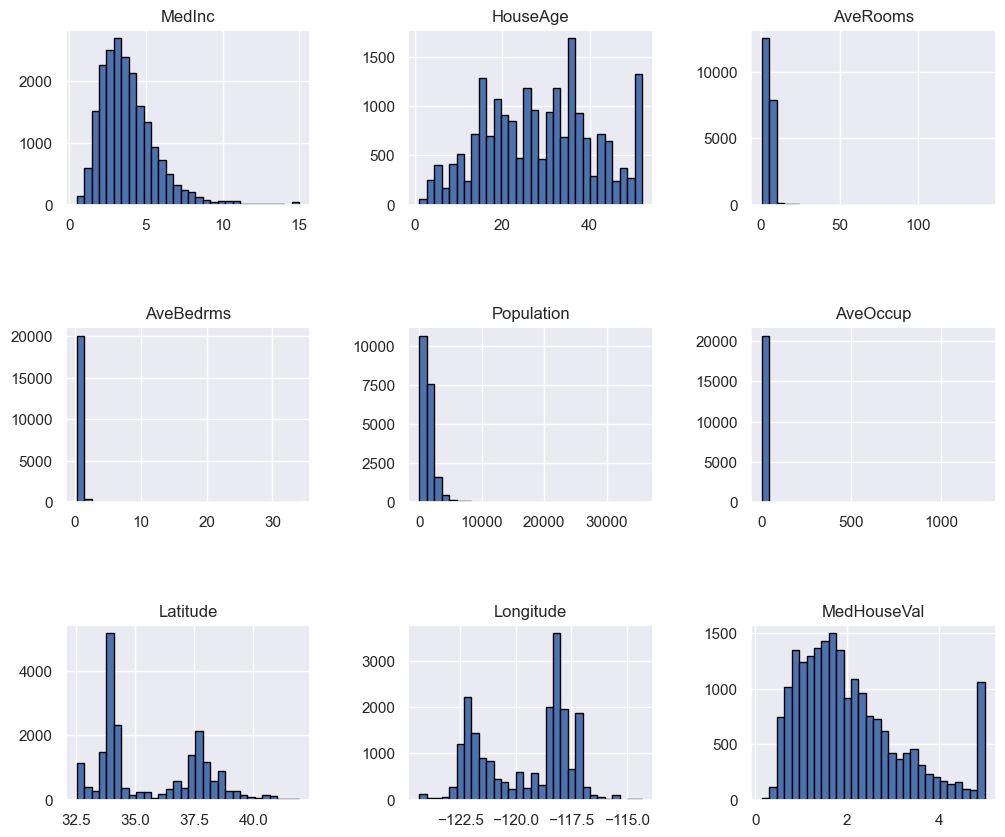

In [188]:
# quickly view the distribution of these features by ploging their histograms.
housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [189]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [190]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [191]:
housing_df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [192]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [193]:
# peak the first 5 rows
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [194]:
# make sure all vales are not null of each key
housing_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

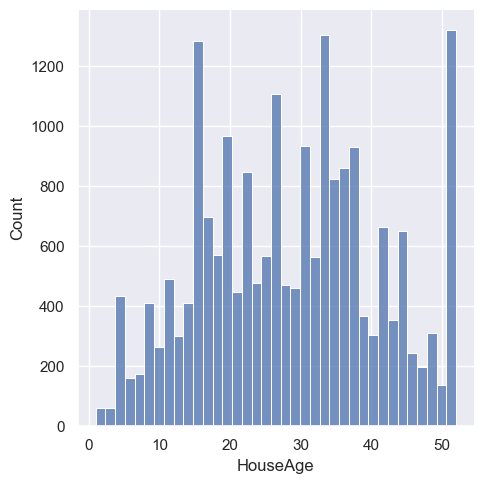

In [195]:
# shows data distrbutions of medv
sns.set(rc={'figure.figsize':(10, 10)})
sns.displot(housing_df['HouseAge'])
plt.show()

calculate correlation
$r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}$

<Axes: >

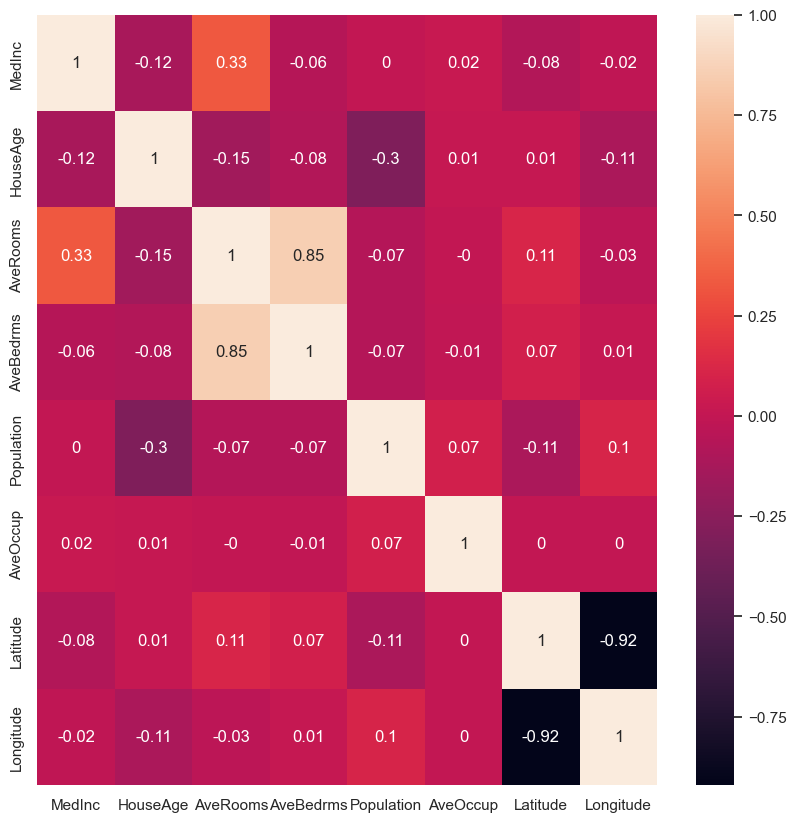

In [196]:
# this cell calculates the correlation of each keys.
correlation_matrix = housing_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

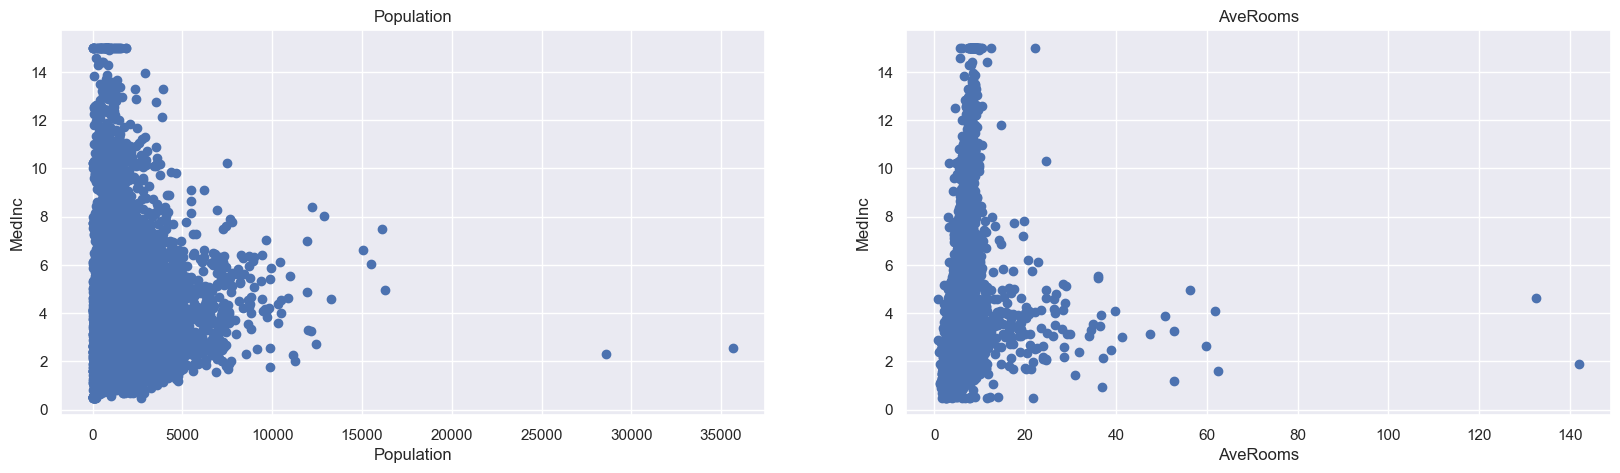

In [202]:
plt.figure(figsize=(20, 5))
features = ['Population', 'AveRooms']
target = housing_df['MedInc']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = housing_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MedInc')

In [203]:
X = pd.DataFrame(np.c_[housing_df['Population'], housing_df['AveRooms']], columns=['Population', 'AveRooms'])
Y = housing_df['Population']

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(f"Num of X training data: {X_train.shape}")
print(f"Num of Y training data: {Y_train.shape}")
print(f"Num of X testing data: {X_test.shape}")
print(f"Num of Y testing data: {Y_test.shape}")

Num of X training data: (16512, 2)
Num of Y training data: (16512,)
Num of X testing data: (4128, 2)
Num of Y testing data: (4128,)


now we are going to train a linear regression model and use R2 score to evaluate the model.

In [205]:
from sklearn.linear_model import  LinearRegression

# create a linear regression model
model = LinearRegression()

# fitting the linear regression model
model.fit(X_train, Y_train)

# predicting using the test data
model.predict(X_test)

# Use R2-score , return the coefficient of determination R^2 of the prediction
# the best possible score is 1.0
print(f"R2: {model.score(X_test, Y_test)}")

R2: 1.0


In [206]:
# plotting the y_test vs y_pred
Y_pred = reg.predict(X_test)
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Population
Feature names seen at fit time, yet now missing:
- MedInc


In [207]:
reg.intercept_

1540.9126267360934

In [208]:
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient'])
print(coeff_df)

            Coefficient
Population    20.957062
AveRooms     -35.597515
